# IDS CASE Study 
* Nivas - HU22CSEN0101720
* Swaran - HU22CSEN0100345
* Vithesh - HU22CSEN0101557
* Jaswanth - HU22CSEN0100820
* Praneeth - HU22CSEN0100261
* Hemanth - HU22CSEN0100565
* Jayanth - HU22CSEN0101734

## Data Exploration

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_excel('datasets/Adidas US Sales Datasets.xlsx',header=4)
df.head()


,Unnamed: 0,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,NaN,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store
1,NaN,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store
2,NaN,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store
3,NaN,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store
4,NaN,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Unnamed: 0        0 non-null      float64       
 1   Retailer          9648 non-null   object        
 2   Retailer ID       9648 non-null   int64         
 3   Invoice Date      9648 non-null   datetime64[ns]
 4   Region            9648 non-null   object        
 5   State             9648 non-null   object        
 6   City              9648 non-null   object        
 7   Product           9648 non-null   object        
 8   Price per Unit    9648 non-null   float64       
 9   Units Sold        9648 non-null   int64         
 10  Total Sales       9648 non-null   float64       
 11  Operating Profit  9648 non-null   float64       
 12  Operating Margin  9648 non-null   float64       
 13  Sales Method      9648 non-null   object        
dtypes: datetime64[ns](1), fl

## Data Cleaning & Descriptive Statistics

In [4]:
df = df.iloc[:,1:]
df

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.00,0.50,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.00,0.30,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.00,0.35,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.00,0.35,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.00,0.30,In-store
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Men's Apparel,50.0,64,3200.0,896.00,0.28,Outlet
9644,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Women's Apparel,41.0,105,4305.0,1377.60,0.32,Outlet
9645,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Street Footwear,41.0,184,7544.0,2791.28,0.37,Outlet
9646,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,42.0,70,2940.0,1234.80,0.42,Outlet


In [5]:
df['Invoice Date'] = pd.to_datetime(df['Invoice Date'])

In [6]:
df['Quarter'] = df['Invoice Date'].dt.quarter

In [7]:
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Quarter
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store,1
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store,1
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store,1
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store,1
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store,1


In [8]:
df.describe()

,Retailer ID,Invoice Date,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Quarter
count,9.648000e+03,9648,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000
mean,1.173850e+06,2021-05-10 15:20:44.776119296,45.216625,256.930037,93273.437500,34425.244761,0.422991,2.492123
min,1.128299e+06,2020-01-01 00:00:00,7.000000,0.000000,0.000000,0.000000,0.100000,1.000000
25%,1.185732e+06,2021-02-17 00:00:00,35.000000,106.000000,4254.500000,1921.752500,0.350000,1.000000
50%,1.185732e+06,2021-06-04 00:00:00,45.000000,176.000000,9576.000000,4371.420000,0.410000,2.000000
75%,1.185732e+06,2021-09-16 00:00:00,55.000000,350.000000,150000.000000,52062.500000,0.490000,3.000000
max,1.197831e+06,2021-12-31 00:00:00,110.000000,1275.000000,825000.000000,390000.000000,0.800000,4.000000
std,2.636038e+04,NaN,14.705397,214.252030,141916.016727,54193.113713,0.097197,1.116487


In [9]:
quarterly_data = df.groupby(['Region', 'Product', 'Quarter']).agg({
    'Units Sold': 'sum',
    'Total Sales': 'sum',
    'Operating Profit': 'mean',
    'Operating Margin': 'mean',
    'Price per Unit': 'mean'
}).reset_index()

In [10]:
quarterly_data

,Region,Product,Quarter,Units Sold,Total Sales,Operating Profit,Operating Margin,Price per Unit
0,Midwest,Men's Apparel,1,12681,4636224.0,28226.985128,0.514231,42.974359
1,Midwest,Men's Apparel,2,10015,4038129.0,19424.896538,0.435641,48.384615
2,Midwest,Men's Apparel,3,11565,4475269.0,21524.309103,0.435128,45.358974
3,Midwest,Men's Apparel,4,11043,4976039.0,23548.544103,0.418590,51.858974
4,Midwest,Men's Athletic Footwear,1,17465,5393675.0,22666.378718,0.398333,35.089744
...,...,...,...,...,...,...,...,...
115,West,Women's Athletic Footwear,4,16591,6033987.0,29984.256857,0.411571,46.485714
116,West,Women's Street Footwear,1,37133,12961544.0,33709.375145,0.410435,45.521739
117,West,Women's Street Footwear,2,34721,13282258.0,38766.378780,0.412195,48.065041
118,West,Women's Street Footwear,3,23440,9601563.0,39334.976234,0.380909,50.857143


## Data Visualization

In [11]:
corr = quarterly_data.drop(columns = ['Region', 'Product']).corr()

<Axes: >

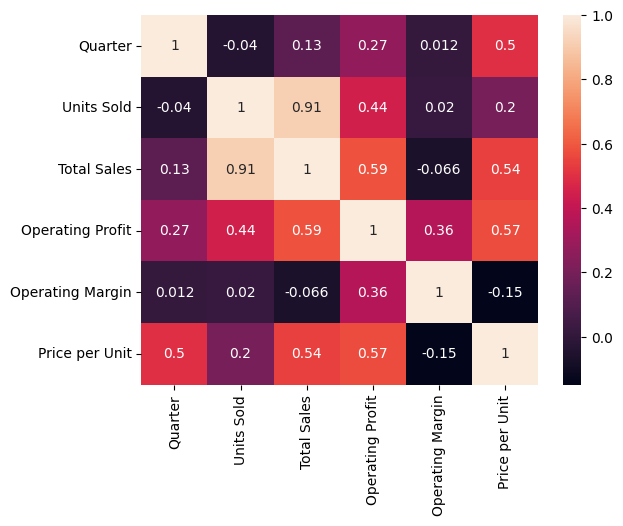

In [12]:
sns.heatmap(corr , annot=True)

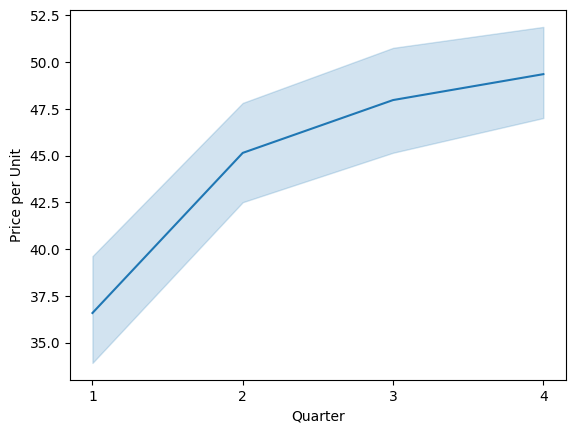

In [13]:
sns.lineplot(data=quarterly_data,x=quarterly_data['Quarter'] , y=quarterly_data['Price per Unit']);
plt.xticks(range(1,5,1));

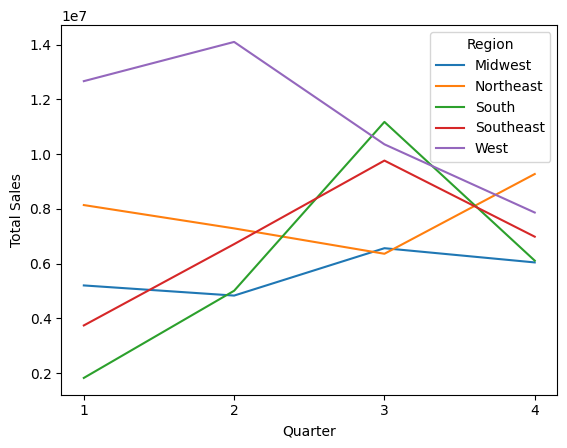

In [14]:
sns.lineplot(data=quarterly_data,x=quarterly_data['Quarter'] , y = quarterly_data['Total Sales'] , hue = quarterly_data['Region'] , errorbar=None);
plt.xticks(range(1,5,1));

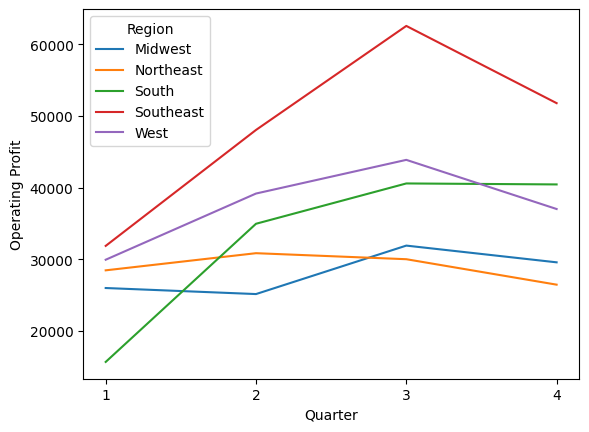

In [15]:
sns.lineplot(data=quarterly_data,x=quarterly_data['Quarter'],y=quarterly_data['Operating Profit'],hue = quarterly_data['Region'],errorbar=None)
plt.xticks(range(1,5,1));

<Axes: xlabel='Quarter', ylabel='Total Sales'>

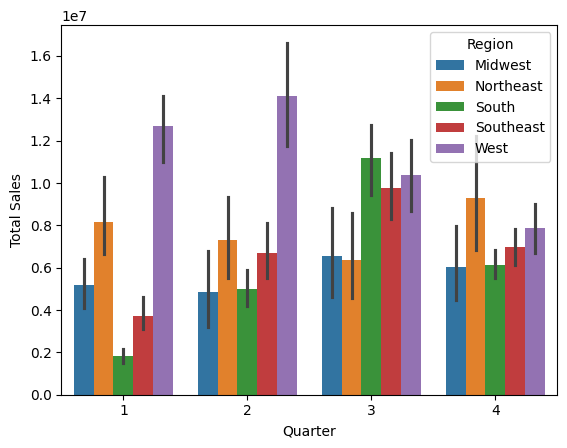

In [16]:
sns.barplot(x=quarterly_data['Quarter'] , y=quarterly_data['Total Sales'],hue = quarterly_data['Region'])

<Axes: xlabel='Quarter', ylabel='Operating Profit'>

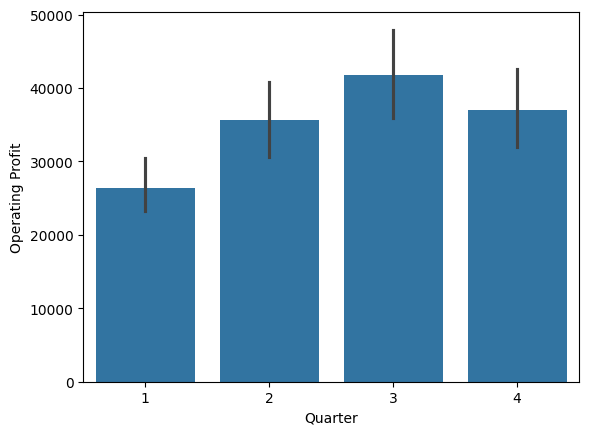

In [17]:
sns.barplot(x=quarterly_data['Quarter'] , y=quarterly_data['Operating Profit'])

<Axes: xlabel='Units Sold', ylabel='Operating Margin'>

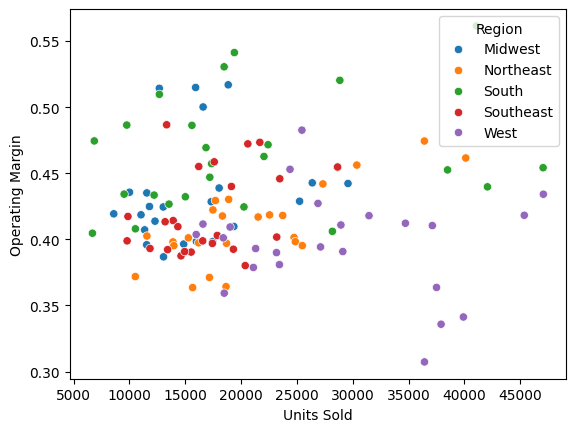

In [18]:
sns.scatterplot(data = quarterly_data , x = quarterly_data['Units Sold'] , y=quarterly_data['Operating Margin'] , hue = quarterly_data['Region'])

## Data Training

### Encoding Categorical data

In [19]:
quarterly_data_4 = quarterly_data[quarterly_data['Quarter'] == 4]
quarterly_data_4

,Region,Product,Quarter,Units Sold,Total Sales,Operating Profit,Operating Margin,Price per Unit
3,Midwest,Men's Apparel,4,11043,4976039.0,23548.544103,0.418590,51.858974
7,Midwest,Men's Athletic Footwear,4,16001,5256690.0,23359.536667,0.398462,38.769231
11,Midwest,Men's Street Footwear,4,25246,9914308.0,48280.104103,0.428846,46.602564
15,Midwest,Women's Apparel,4,16605,7826307.0,45436.000385,0.500128,54.743590
19,Midwest,Women's Athletic Footwear,4,11368,3977221.0,18183.558205,0.407179,39.538462
23,Midwest,Women's Street Footwear,4,13061,4298501.0,18589.979487,0.386795,37.653846
27,Northeast,Men's Apparel,4,15669,7196046.0,16908.894074,0.363556,57.340741
31,Northeast,Men's Athletic Footwear,4,21533,8336018.0,23466.166000,0.416923,48.876923
35,Northeast,Men's Street Footwear,4,36420,15882952.0,50862.151538,0.474385,55.715385
39,Northeast,Women's Apparel,4,23734,11437700.0,33403.009615,0.418077,59.900000


In [20]:
quarterly_data = quarterly_data.drop(quarterly_data_4.index , axis = 0)
quarterly_data

,Region,Product,Quarter,Units Sold,Total Sales,Operating Profit,Operating Margin,Price per Unit
0,Midwest,Men's Apparel,1,12681,4636224.0,28226.985128,0.514231,42.974359
1,Midwest,Men's Apparel,2,10015,4038129.0,19424.896538,0.435641,48.384615
2,Midwest,Men's Apparel,3,11565,4475269.0,21524.309103,0.435128,45.358974
4,Midwest,Men's Athletic Footwear,1,17465,5393675.0,22666.378718,0.398333,35.089744
5,Midwest,Men's Athletic Footwear,2,12296,3829706.0,18622.464730,0.413784,36.675676
...,...,...,...,...,...,...,...,...
113,West,Women's Athletic Footwear,2,28945,10726388.0,30647.473496,0.410894,46.699187
114,West,Women's Athletic Footwear,3,19022,7786022.0,33981.370000,0.409351,50.285714
116,West,Women's Street Footwear,1,37133,12961544.0,33709.375145,0.410435,45.521739
117,West,Women's Street Footwear,2,34721,13282258.0,38766.378780,0.412195,48.065041


In [21]:
x_train = quarterly_data.drop('Total Sales' ,axis = 1).values
print(x_train.shape , x_train.ndim , x_train)

(90, 7) 2 [['Midwest' "Men's Apparel" 1 12681 28226.985128205128 0.5142307692307693
  42.97435897435897]
 ['Midwest' "Men's Apparel" 2 10015 19424.896538461537 0.4356410256410256
  48.38461538461539]
 ['Midwest' "Men's Apparel" 3 11565 21524.3091025641 0.4351282051282051
  45.35897435897436]
 ['Midwest' "Men's Athletic Footwear" 1 17465 22666.37871794872
  0.3983333333333333 35.08974358974359]
 ['Midwest' "Men's Athletic Footwear" 2 12296 18622.46472972973
  0.4137837837837838 36.67567567567568]
 ['Midwest' "Men's Athletic Footwear" 3 19358 29740.61756097561
  0.40975609756097564 41.75609756097562]
 ['Midwest' "Men's Street Footwear" 1 28656 40886.39461538462
  0.4543589743589743 33.12820512820513]
 ['Midwest' "Men's Street Footwear" 2 26378 46732.371315789474
  0.4427631578947368 41.078947368421055]
 ['Midwest' "Men's Street Footwear" 3 29581 56134.069875
  0.44225000000000003 46.3]
 ['Midwest' "Women's Apparel" 1 18040 25502.792564102565
  0.4388461538461539 36.35897435897436]
 ['Mid

In [22]:
y_train = quarterly_data['Total Sales'].values
y_train , y_train.shape,y_train.ndim

(array([ 4636224.,  4038129.,  4475269.,  5393675.,  3829706.,  6825468.,
         7847423.,  9071914., 11489165.,  5765598.,  6544155.,  8070323.,
         3283352.,  2430366.,  3904229.,  4278219.,  3063637.,  4604541.,
         7223599.,  7024080.,  4300687.,  8022411.,  6130992.,  6384816.,
        12964488., 11434255., 10743329.,  8309635.,  9447270.,  8348478.,
         5556340.,  4563908.,  3781235.,  6751593.,  5111748.,  4588850.,
         1676937.,  4001637.,  8829979.,  2090353.,  4811224., 12871136.,
         2481836.,  5810401., 13380884.,  1908348.,  6881660., 13131385.,
         1309468.,  3664657.,  8011695.,  1455413.,  4868365., 10837255.,
         3441532.,  5405898.,  8930155.,  3897392.,  6450762., 10453333.,
         5592979.,  9027581., 13415662.,  3760701.,  8586843., 10482536.,
         2560203.,  4908845.,  6996084.,  3179173.,  5883561.,  8304428.,
        10081076., 10379350.,  8595994., 14502643., 14848926., 12041522.,
        14181557., 17337183., 13697658

In [23]:
x_test = quarterly_data_4.drop('Total Sales' , axis = 1).values
x_test

array([['Midwest', "Men's Apparel", 4, 11043, 23548.5441025641,
        0.41858974358974355, 51.85897435897436],
       ['Midwest', "Men's Athletic Footwear", 4, 16001,
        23359.536666666667, 0.3984615384615384, 38.76923076923077],
       ['Midwest', "Men's Street Footwear", 4, 25246, 48280.1041025641,
        0.4288461538461539, 46.6025641025641],
       ['Midwest', "Women's Apparel", 4, 16605, 45436.000384615385,
        0.5001282051282051, 54.743589743589745],
       ['Midwest', "Women's Athletic Footwear", 4, 11368,
        18183.558205128207, 0.4071794871794872, 39.53846153846154],
       ['Midwest', "Women's Street Footwear", 4, 13061,
        18589.979487179487, 0.38679487179487176, 37.65384615384615],
       ['Northeast', "Men's Apparel", 4, 15669, 16908.894074074076,
        0.3635555555555555, 57.34074074074074],
       ['Northeast', "Men's Athletic Footwear", 4, 21533, 23466.166,
        0.4169230769230769, 48.87692307692308],
       ['Northeast', "Men's Street Footwear

In [24]:
y_test = quarterly_data_4['Total Sales'].values
y_test.shape,y_test.ndim,y_test

((30,),
 1,
 array([ 4976039.,  5256690.,  9914308.,  7826307.,  3977221.,  4298501.,
         7196046.,  8336018., 15882952., 11437700.,  5894655.,  6888982.,
         5194516.,  5937832.,  6771440.,  7685794.,  5434902.,  5616064.,
         6683902.,  6975533.,  7983014.,  8661081.,  5837666.,  5752372.,
         6637583.,  8613248.,  9798215.,  9433016.,  6033987.,  6674746.]))

In [25]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",one_hot,[0,1])],remainder = "passthrough")
x_train = transformer.fit_transform(x_train)
x_test = transformer.transform(x_test)

In [26]:
print(x_train[1],'\n',x_test[1])

[1.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 2 10015 19424.896538461537
 0.4356410256410256 48.38461538461539] 
 [1.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 4 16001 23359.536666666667
 0.3984615384615384 38.76923076923077]


## Model fitting

In [27]:
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,BaggingRegressor,ExtraTreesRegressor,GradientBoostingRegressor,HistGradientBoostingRegressor
np.random.seed(2)
model = RandomForestRegressor()
model.fit(x_train,y_train)
acc = model.score(x_test,y_test)
print(f'The Accuracy of the model is {acc*100:.2f}')

The Accuracy of the model is 90.53


In [28]:
acc = model.score(x_test,y_test)
print(f'The Accuracy of the model is {acc*100:.2f}')

The Accuracy of the model is 90.53


## Evaluation of the Model

### regression Evalution metrics:
* ROC CURVE (AUC)
* F1_score
* classification_report (precission , recall , accuracy)

In [29]:
from sklearn.metrics import r2_score , mean_absolute_error,mean_squared_error

In [30]:
y_preds = model.predict(x_test)


In [31]:
print(f'The f1 Score of the mdoel is {r2_score(y_test,y_preds)*100:.2f}')
print(f'The mean absolute error of the mdoel is {mean_absolute_error(y_test,y_preds)*100:.2f}')
print(f'The mean squared of the mdoel is {mean_squared_error(y_test,y_preds)*100:.2f}')

The f1 Score of the mdoel is 90.53
The mean absolute error of the mdoel is 54876889.50
The mean squared of the mdoel is 52386817437087.82


In [58]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge, HuberRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import SGDRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "ElasticNet": ElasticNet(max_iter=2000),
    "Bayesian Ridge": BayesianRidge(),
    "SVR": SVR(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBoost": XGBRegressor(),
    "CatBoost": CatBoostRegressor(verbose=0),  # Suppress CatBoost output
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "SGD Regressor": SGDRegressor(),
    "Huber Regressor": HuberRegressor(),
    "Gaussian Process": GaussianProcessRegressor()
}

useful_models = {}
# Fit and score each model
for model_name, model in models.items():
    try:
        # Fit model
        model.fit(x_train, y_train)
        # Predict on test data
        y_pred = model.predict(x_test)
        # Calculate R² score
        score = r2_score(y_test, y_pred)
        print(f"{model_name}: R² score = {score:.4f}")
        if score > 0.90 :
            useful_models[model_name] = score
    except Exception as e:
        print(f"{model_name}: Error - {e}")


Linear Regression: R² score = 0.8665
Ridge Regression: R² score = 0.9234
Lasso Regression: R² score = 0.8665
ElasticNet: R² score = 0.9455
Bayesian Ridge: R² score = 0.7486
SVR: R² score = -0.0179
Decision Tree: R² score = 0.8402


C:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.865e+11, tolerance: 1.361e+11
  model = cd_fast.enet_coordinate_descent(


Random Forest: R² score = 0.9027
Gradient Boosting: R² score = 0.9211
XGBoost: R² score = 0.9420
CatBoost: R² score = 0.8534
K-Nearest Neighbors: R² score = 0.6693
AdaBoost: R² score = 0.8229
SGD Regressor: R² score = -17981433683147298439168.0000
Huber Regressor: R² score = 0.8223
Gaussian Process: R² score = -9.5086


In [60]:
print('the models which are providing the 90 + accuracy are:\n')
for i,j in useful_models.items():
    print(f'{i} : {j} ')

the models which are providing the 90 + accuracy are:

Ridge Regression : 0.9234407883695885 
ElasticNet : 0.9455313797784513 
Random Forest : 0.9026915745775677 
Gradient Boosting : 0.921066127056587 
XGBoost : 0.9419869691375872 
